<div style="
    display: block;
    padding: 12px 20px;
    background-color: #1A73E8;
    color: white;
    border-radius: 30px;
    font-family: 'Helvetica Neue', Arial, sans-serif;
    font-size: 16px;
    font-weight: 600;
    margin: 15px auto;
    width: fit-content;
    box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
    text-align: center;
    letter-spacing: 0.5px;
">
    <strong>LLM FLOW - Example 2</strong>
</div>

<div style="
    display: block;
    padding: 12px 20px;
    background-color: #66BB6A;
    color: white;
    border-radius: 30px;
    font-family: 'Helvetica Neue', Arial, sans-serif;
    font-size: 16px;
    font-weight: 600;
    margin: 15px auto;
    width: fit-content;
    box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
    text-align: center;
    letter-spacing: 0.5px;
">
    <strong>Simon-Pierre Boucher</strong>
</div>

<div style="
    display: block;
    padding: 12px 20px;
    background-color: #FFA726;
    color: white;
    border-radius: 30px;
    font-family: 'Helvetica Neue', Arial, sans-serif;
    font-size: 16px;
    font-weight: 600;
    margin: 15px auto;
    width: fit-content;
    box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);
    text-align: center;
    letter-spacing: 0.5px;
">
    <strong>2024-09-14</strong>
</div>


![OpenAI](https://img.shields.io/badge/Code-OpenAI-412991?style=flat-square&logo=openai&logoColor=white)
![Powered by OpenAI](https://img.shields.io/badge/Powered%20by-OpenAI-412991?style=flat-square&logo=openai&logoColor=white)
![Using OpenAI](https://img.shields.io/badge/Using-OpenAI-blue?style=flat-square&logo=openai&logoColor=white)
![OpenAI](https://img.shields.io/badge/Model-OpenAI-412991?style=flat-square&logo=openai&logoColor=white)
![GPT-4](https://img.shields.io/badge/Model-GPT--4-008080?style=flat-square&logo=openai&logoColor=white)
![GPT-3](https://img.shields.io/badge/Model-GPT--3-00A896?style=flat-square&logo=openai&logoColor=white)
![Anthropic](https://img.shields.io/badge/Model-Claude-FF6F61?style=flat-square&logo=anthropic&logoColor=white)
![Mistral](https://img.shields.io/badge/Model-Mistral-6A5ACD?style=flat-square)

### **Overview**
The following code implements a modular framework for interacting with different language model APIs (OpenAI, Anthropic, and Mistral) to generate text, retrieve embeddings, perform semantic searches, and process multi-step prompt flows. This code is designed to facilitate dynamic text generation and data processing using various models in a structured workflow.



### **Step-by-Step Breakdown**

1. **Importing Libraries and Setting Up the Environment**
    - Imports necessary modules, including `asyncio`, `aiohttp` (for async HTTP requests), and `logging` for logging messages.
    - Loads environment variables using `dotenv` to manage API keys securely.
    - Initializes `colorama` for text styling in console output and applies `nest_asyncio` for async functionality in Jupyter environments.

2. **Logging and Environment Variable Loading**
    - Configures logging to display messages with the time and level (INFO, WARNING, ERROR).
    - Loads API keys (`OPENAI_API_KEY`, `ANTHROPIC_API_KEY`, `MISTRAL_API_KEY`) from the environment variables to interact with different model APIs.
    - Warns if any of the API keys are not set.

3. **Utility Function**
    - **`num_tokens_from_string`**: Calculates the number of tokens in a string based on the specified model using `tiktoken`. This helps in managing input length for different models.

4. **Custom Exception Class**
    - **`APIException`**: Defines a custom exception to handle API-related errors gracefully.

5. **Abstract Base Class (`ModelAPI`)**
    - Implements an abstract class to define a common interface for model APIs. It includes abstract methods `generate_text` (to generate text) and `extract_text_from_response` (to parse the response).

6. **API Implementations**
    - **`OpenAIAPI`**, **`AnthropicAPI`**, and **`MistralAPI`**: Concrete classes implementing the `ModelAPI` abstract base class. Each has:
        - An `__init__` method to store the API key.
        - An `async` method `generate_text` to send requests to the respective model API.
        - A method `extract_text_from_response` to extract the generated text from the API's response.
        - The OpenAI class includes an additional method `get_embeddings` to retrieve text embeddings.

7. **`APIClient` Class**
    - Initializes instances of the API classes (`OpenAIAPI`, `AnthropicAPI`, `MistralAPI`).
    - **`generate_text`**: Determines which API to use based on the model name and handles token limit constraints. Calls the `generate_text` method of the respective API.
    - **`split_and_process`**: If the prompt exceeds the token limit, splits the prompt into smaller parts, processes them, and combines the responses. Summarizes the response if the combined text exceeds the token limit.
    - **`get_embeddings`**: Uses the OpenAI API to fetch embeddings for a list of texts.

8. **`PromptBlock` Class**
    - Represents a unit of work (block) in the prompt flow. Each block has properties like `prompt`, `model`, `max_tokens`, and `temperature`.
    - Stores external data (e.g., URL) or semantic search settings.
    - **`add_input`**: Specifies input connections from other blocks.
    - **`load_external_data`**: Fetches and processes external data (API, website, PDF) asynchronously.

9. **`Step` Class**
    - Contains a list of `PromptBlock` objects to represent an individual step in the workflow.
    - **`add_block`**: Adds a `PromptBlock` to the step.

10. **`SemanticSearch` Class**
    - Handles semantic search using text embeddings.
    - **`split_text`**: Splits text into smaller chunks.
    - **`cosine_similarity`**: Calculates cosine similarity between two vectors.
    - **`search`**: Asynchronously performs semantic search on chunks of text to find the most relevant segments.

11. **`FlowManager` Class**
    - Manages the overall workflow consisting of multiple steps and blocks.
    - Initializes an `APIClient` and `SemanticSearch` instance.
    - **`add_step`**: Adds a `Step` object to the workflow.
    - **`process_step`**: Processes all blocks in a given step, fetching input texts, external data, and performing semantic searches if specified. Executes the prompts using the API client.
    - **`collect_input_texts`**: Gathers input texts from connected blocks in previous steps.
    - **`run_flow`**: Executes the entire workflow, processing each step in order.
    - **`display_step_results`**: Displays the results of each block in a step.
    - **`visualize_flow`** and **`generate_dot_code`**: Generates a graphical representation of the workflow using Graphviz.

12. **Helper Function (`create_modular_flow`)**
    - Accepts a configuration for steps and blocks, constructs a `FlowManager` with steps and blocks based on the configuration, and returns the `FlowManager` object for execution.


### **Summary**
The code implements an asynchronous framework to interact with multiple language model APIs (OpenAI, Anthropic, Mistral). It defines classes to structure and manage the input prompts, data processing, and text generation in a multi-step flow. This modular design allows for flexible addition of steps, blocks, and API interactions, making it a versatile tool for complex prompt flows.

In [2]:
import asyncio
import aiohttp
import nest_asyncio
import os
import logging
from dotenv import load_dotenv
from colorama import init, Fore, Style
from graphviz import Source
from IPython.display import display
from bs4 import BeautifulSoup
from abc import ABC, abstractmethod
from typing import List, Dict, Any, Optional, Tuple
import numpy as np
import json
import re
import tiktoken

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Initialize colorama and nest_asyncio for Jupyter environments
init(autoreset=True)
nest_asyncio.apply()

# Load environment variables
load_dotenv()

# Check if API keys are set
api_keys = {
    "openai": os.getenv("OPENAI_API_KEY"),
    "anthropic": os.getenv("ANTHROPIC_API_KEY"),
    "mistral": os.getenv("MISTRAL_API_KEY")
}

for api, key in api_keys.items():
    if not key:
        logging.warning(f"{api.upper()}_API_KEY is not set in the environment variables.")

def num_tokens_from_string(string: str, model_name: str) -> int:
    encoding = tiktoken.encoding_for_model(model_name)
    return len(encoding.encode(string))

class APIException(Exception):
    """Custom exception for API-related errors."""
    pass

class ModelAPI(ABC):
    @abstractmethod
    async def generate_text(self, session: aiohttp.ClientSession, model: str, prompt: str, 
                            temperature: float, max_tokens: int) -> Dict[str, Any]:
        pass

    @abstractmethod
    def extract_text_from_response(self, response: Dict[str, Any]) -> str:
        pass

class OpenAIAPI(ModelAPI):
    def __init__(self, api_key: str):
        self.api_key = api_key

    async def generate_text(self, session: aiohttp.ClientSession, model: str, prompt: str, 
                            temperature: float, max_tokens: int) -> Dict[str, Any]:
        url = "https://api.openai.com/v1/chat/completions"
        headers = {
            "Content-Type": "application/json",
            "Authorization": f"Bearer {self.api_key}"
        }
        data = {
            "model": model,
            "messages": [{"role": "user", "content": prompt}],
            "temperature": temperature,
            "max_tokens": max_tokens,
        }
        async with session.post(url, headers=headers, json=data) as response:
            if response.status != 200:
                raise APIException(f"OpenAI API error: {await response.text()}")
            return await response.json()

    def extract_text_from_response(self, response: Dict[str, Any]) -> str:
        return response["choices"][0]["message"]["content"].strip()

    async def get_embeddings(self, session: aiohttp.ClientSession, texts: List[str]) -> List[List[float]]:
        url = "https://api.openai.com/v1/embeddings"
        headers = {
            "Content-Type": "application/json",
            "Authorization": f"Bearer {self.api_key}"
        }
        data = {
            "model": "text-embedding-ada-002",
            "input": texts
        }
        async with session.post(url, headers=headers, json=data) as response:
            if response.status != 200:
                raise APIException(f"OpenAI Embedding API error: {await response.text()}")
            result = await response.json()
            return [item['embedding'] for item in result['data']]

class AnthropicAPI(ModelAPI):
    def __init__(self, api_key: str):
        self.api_key = api_key

    async def generate_text(self, session: aiohttp.ClientSession, model: str, prompt: str, 
                            temperature: float, max_tokens: int) -> Dict[str, Any]:
        url = "https://api.anthropic.com/v1/messages"
        headers = {
            "Content-Type": "application/json",
            "x-api-key": self.api_key,
            "anthropic-version": "2023-06-01"
        }
        data = {
            "model": model,
            "max_tokens": max_tokens,
            "temperature": temperature,
            "messages": [{"role": "user", "content": prompt}]
        }
        async with session.post(url, headers=headers, json=data) as response:
            if response.status != 200:
                raise APIException(f"Anthropic API error: {await response.text()}")
            return await response.json()

    def extract_text_from_response(self, response: Dict[str, Any]) -> str:
        return response["content"][0]["text"].strip()

class MistralAPI(ModelAPI):
    def __init__(self, api_key: str):
        self.api_key = api_key

    async def generate_text(self, session: aiohttp.ClientSession, model: str, prompt: str, 
                            temperature: float, max_tokens: int) -> Dict[str, Any]:
        url = "https://api.mistral.ai/v1/chat/completions"
        headers = {
            "Content-Type": "application/json",
            "Accept": "application/json",
            "Authorization": f"Bearer {self.api_key}"
        }
        data = {
            "model": model,
            "messages": [{"role": "user", "content": prompt}],
            "temperature": temperature,
            "max_tokens": max_tokens,
        }
        async with session.post(url, headers=headers, json=data) as response:
            if response.status != 200:
                raise APIException(f"Mistral API error: {await response.text()}")
            return await response.json()

    def extract_text_from_response(self, response: Dict[str, Any]) -> str:
        return response["choices"][0]["message"]["content"].strip()

class APIClient:
    def __init__(self, api_keys: Dict[str, str]):
        self.apis = {
            "openai": OpenAIAPI(api_keys.get("openai")),
            "anthropic": AnthropicAPI(api_keys.get("anthropic")),
            "mistral": MistralAPI(api_keys.get("mistral")),
        }

    async def generate_text(self, session: aiohttp.ClientSession, model: str, prompt: str, 
                            temperature: float, max_tokens: int) -> str:
        if model.startswith(("gpt", "text-davinci")):
            api_type = "openai"
        elif model.startswith("claude"):
            api_type = "anthropic"
        elif model.startswith("mistral"):
            api_type = "mistral"
        else:
            raise ValueError(f"Unsupported model: {model}")
        
        try:
            token_limit = 16000  # Adjust based on the model
            if num_tokens_from_string(prompt, model) > token_limit:
                logging.info(f"Prompt exceeds token limit. Splitting into multiple parts.")
                return await self.split_and_process(session, model, prompt, temperature, max_tokens, token_limit)
            else:
                response = await self.apis[api_type].generate_text(session, model, prompt, temperature, max_tokens)
                return self.apis[api_type].extract_text_from_response(response)
        except APIException as e:
            logging.error(f"API error: {str(e)}")
            return "Error: Unable to generate text."

    async def split_and_process(self, session: aiohttp.ClientSession, model: str, prompt: str, 
                                temperature: float, max_tokens: int, token_limit: int) -> str:
        parts = self.split_prompt(prompt, token_limit)
        responses = []

        for i, part in enumerate(parts):
            logging.info(f"Processing part {i+1} of {len(parts)}")
            response = await self.generate_text(session, model, part, temperature, max_tokens // len(parts))
            responses.append(response)
            logging.info(f"Completed processing part {i+1}")

        combined_response = " ".join(responses)
        logging.info("All parts processed. Combining responses.")

        if len(combined_response) > token_limit:
            logging.info("Combined response exceeds token limit. Generating summary.")
            summary_prompt = f"Summarize the following text:\n\n{combined_response}"
            final_response = await self.generate_text(session, model, summary_prompt, temperature, max_tokens)
            logging.info("Summary generated.")
            return final_response
        else:
            logging.info("Returning combined response.")
            return combined_response

    def split_prompt(self, prompt: str, token_limit: int) -> List[str]:
        words = prompt.split()
        parts = []
        current_part = []
        current_tokens = 0

        for word in words:
            word_tokens = num_tokens_from_string(word, "gpt-3.5-turbo")
            if current_tokens + word_tokens > token_limit:
                parts.append(" ".join(current_part))
                current_part = [word]
                current_tokens = word_tokens
            else:
                current_part.append(word)
                current_tokens += word_tokens

        if current_part:
            parts.append(" ".join(current_part))

        return parts

    async def get_embeddings(self, session: aiohttp.ClientSession, texts: List[str]) -> List[List[float]]:
        return await self.apis["openai"].get_embeddings(session, texts)

class PromptBlock:
    def __init__(self, prompt: str, model: str = "gpt-3.5-turbo", max_tokens: int = 2000, 
                 temperature: float = 0.7, external_data: Optional[Dict[str, str]] = None,
                 semantic_search: Optional[Dict[str, Any]] = None):
        self.prompt = prompt
        self.model = model
        self.max_tokens = max_tokens
        self.temperature = temperature
        self.output = None
        self.input_blocks: List[Tuple[int, int]] = []
        self.external_data = external_data
        self.semantic_search = semantic_search

    def add_input(self, step_index: int, block_index: int):
        self.input_blocks.append((step_index, block_index))

    async def load_external_data(self, session: aiohttp.ClientSession) -> str:
        if not self.external_data:
            return ""

        data_type = self.external_data.get('type')
        url = self.external_data.get('url')

        try:
            async with session.get(url, timeout=30) as response:
                response.raise_for_status()
                if data_type == 'api':
                    data = await response.json()
                    return json.dumps(data, indent=2)
                elif data_type == 'site web':
                    text = await response.text()
                    soup = BeautifulSoup(text, 'html.parser')
                    
                    all_text = soup.get_text(separator='\n', strip=True)
                    all_text = re.sub(r'<[^>]+>', '', all_text)
                    all_text = re.sub(r'\s+', ' ', all_text).strip()
                    
                    links = [a.get('href') for a in soup.find_all('a', href=True)]
                    
                    tables = []
                    for table in soup.find_all('table'):
                        table_data = []
                        for row in table.find_all('tr'):
                            row_data = [cell.get_text(strip=True) for cell in row.find_all(['th', 'td'])]
                            table_data.append(row_data)
                        tables.append(table_data)
                    
                    combined_data = {
                        "text_content": all_text,
                        "links": links,
                        "tables": tables
                    }
                    
                    return json.dumps(combined_data, indent=2)
                elif data_type == 'pdf':
                    content = await response.read()
                    return f"PDF content (bytes): {len(content)}"
        except Exception as e:
            logging.error(f"Error loading external data from {url}: {str(e)}")
            return f"Error loading external data: {str(e)}"

class Step:
    def __init__(self):
        self.blocks: List[PromptBlock] = []

    def add_block(self, block: PromptBlock):
        self.blocks.append(block)

class SemanticSearch:
    def __init__(self, api_client: APIClient, words_per_chunk: int = 100):
        self.api_client = api_client
        self.words_per_chunk = words_per_chunk

    @staticmethod
    def split_text(text: str, words_per_chunk: int) -> List[str]:
        words = text.split()
        return [' '.join(words[i:i+words_per_chunk]) for i in range(0, len(words), words_per_chunk)]

    @staticmethod
    def cosine_similarity(vec1: List[float], vec2: List[float]) -> float:
        return np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

    async def search(self, session: aiohttp.ClientSession, query: str, text: str, top_k: int) -> List[Tuple[str, float]]:
        chunks = self.split_text(text, self.words_per_chunk)
        query_embedding = await self.api_client.get_embeddings(session, [query])
        chunk_embeddings = await self.api_client.get_embeddings(session, chunks)
        
        similarities = [self.cosine_similarity(query_embedding[0], chunk_emb) for chunk_emb in chunk_embeddings]
        top_indices = np.argsort(similarities)[-top_k:][::-1]
        return [(chunks[i], similarities[i]) for i in top_indices]

class FlowManager:
    def __init__(self, api_keys: Dict[str, str], words_per_chunk: int = 100, default_top_k: int = 3):
        self.steps: List[Step] = []
        self.api_client = APIClient(api_keys)
        self.semantic_search = SemanticSearch(self.api_client, words_per_chunk)
        self.default_top_k = default_top_k

    def add_step(self, step: Step):
        self.steps.append(step)

    async def process_step(self, step_index: int):
        if step_index == 0:
            for block in self.steps[step_index].blocks:
                if block.input_blocks:
                    logging.warning(f"Step 1, Block cannot have inputs from other blocks.")
                    return

        async with aiohttp.ClientSession() as session:
            tasks = []
            for block in self.steps[step_index].blocks:
                all_input_texts = self.collect_input_texts(step_index, block)
                
                external_data_text = await block.load_external_data(session)
                logging.info(f"External data for Step {step_index + 1}, Block {len(tasks) + 1}: {external_data_text[:100]}...")
                
                if block.semantic_search:
                    query = block.semantic_search.get('query', '')
                    top_k = block.semantic_search.get('top_k', self.default_top_k)
                    search_inputs = block.semantic_search.get('inputs', ['all'])
                    
                    relevant_chunks = []
                    
                    if 'all' in search_inputs or 'previous' in search_inputs:
                        input_search_text = '\n'.join(all_input_texts)
                        relevant_input_chunks = await self.semantic_search.search(session, query, input_search_text, top_k)
                        relevant_chunks.extend(relevant_input_chunks)
                    
                    if 'all' in search_inputs or 'external' in search_inputs:
                        if external_data_text:
                            relevant_external_chunks = await self.semantic_search.search(session, query, external_data_text, top_k)
                            relevant_chunks.extend(relevant_external_chunks)
                    
                    input_texts = [chunk for chunk, _ in relevant_chunks]
                    logging.info(f"Semantic search results: {[(chunk[:100], score) for chunk, score in relevant_chunks[:2]]}")
                else:
                    input_texts = all_input_texts + ([external_data_text] if external_data_text else [])

                if input_texts:
                    merged_input = "\n".join(input_texts)
                    block.prompt = f"{merged_input}\n\n{block.prompt}"

                logging.info(f"Processing Step {step_index + 1}, Block {len(tasks) + 1}")
                logging.info(f"Prompt: {block.prompt[:100]}...")

                task = self.api_client.generate_text(
                    session, block.model, block.prompt, block.temperature, block.max_tokens
                )
                tasks.append(task)

            results = await asyncio.gather(*tasks)
            for block, result in zip(self.steps[step_index].blocks, results):
                block.output = result

    def collect_input_texts(self, step_index: int, block: PromptBlock) -> List[str]:
        return [self.steps[input_step].blocks[input_block].output 
                for input_step, input_block in block.input_blocks 
                if input_step < step_index]

    async def run_flow(self):
        self.visualize_flow()
        for i in range(len(self.steps)):
            await self.process_step(i)
            self.display_step_results(i)

    def display_step_results(self, step_index: int):
        print(f"\n{Fore.GREEN}{Style.BRIGHT}Step {step_index + 1} Results:{Style.RESET_ALL}")
        for j, block in enumerate(self.steps[step_index].blocks):
            print(f"{Fore.BLUE}{Style.BRIGHT}Block {j + 1} (Model: {block.model}, Max Tokens: {block.max_tokens}):{Style.RESET_ALL}")
            print(f"\n{Fore.YELLOW}Output:{Style.RESET_ALL} {block.output}\n")

    def visualize_flow(self):
        dot_code = self.generate_dot_code()
        graph = Source(dot_code)
        display(graph)

    def generate_dot_code(self) -> str:
        dot_code = """
        digraph G {
            node [style="filled", fontname="Arial", shape="box", margin="0.2,0.1"];
            edge [fontname="Arial"];
        """
        
        colors = ["#FFB3BA", "#BAFFC9", "#BAE1FF", "#FFFFBA", "#FFD8B9"]
        
        for i, step in enumerate(self.steps):
            step_color = colors[i % len(colors)]
            for j, block in enumerate(step.blocks):
                node_id = f"Block{i+1}_{j+1}"
                external_data_info = f"\\nExternal Data: {block.external_data.get('type', '').upper()}" if block.external_data else ""
                semantic_search_info = "\\nSemantic Search" if block.semantic_search else ""
                label = f"Step {i+1}, Block {j+1}\\nModel: {block.model}{external_data_info}{semantic_search_info}\\nPrompt: {block.prompt[:50]}..."
                dot_code += f'    {node_id} [label="{label}", fillcolor="{step_color}"];\n'
                for input_step, input_block in block.input_blocks:
                    input_id = f"Block{input_step+1}_{input_block+1}"
                    dot_code += f"    {input_id} -> {node_id};\n"
        
        dot_code += "}"
        return dot_code

def create_modular_flow(steps_config: List[Dict[str, Any]], api_keys: Dict[str, str], words_per_chunk: int = 100, default_top_k: int = 3) -> FlowManager:
    flow_manager = FlowManager(api_keys, words_per_chunk=words_per_chunk, default_top_k=default_top_k)
    
    for step_config in steps_config:
        step = Step()
        for block_config in step_config['blocks']:
            block = PromptBlock(
                prompt=block_config['prompt'],
                model=block_config.get('model', 'gpt-3.5-turbo'),
                max_tokens=block_config.get('max_tokens', 2000),
                temperature=block_config.get('temperature', 0.7),
                external_data=block_config.get('external_data'),
                semantic_search=block_config.get('semantic_search')
            )
            for input_ref in block_config.get('inputs', []):
                block.add_input(input_ref[0], input_ref[1])
            step.add_block(block)
        flow_manager.add_step(step)
    
    return flow_manager



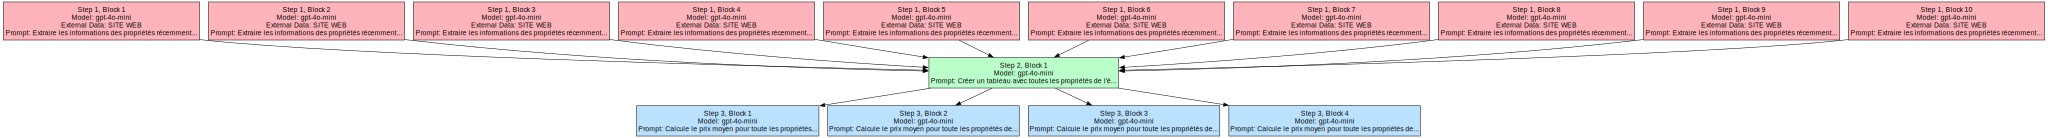

2024-09-18 10:58:28,385 - INFO - External data for Step 1, Block 1: {
  "text_content": "Condos, maisons \u00e0 vendre, Qu\u00e9bec Retour \u00e0 la page d\u2019accueil...
2024-09-18 10:58:28,386 - INFO - Processing Step 1, Block 1
2024-09-18 10:58:28,386 - INFO - Prompt: {
  "text_content": "Condos, maisons \u00e0 vendre, Qu\u00e9bec Retour \u00e0 la page d\u2019accueil...
2024-09-18 10:58:29,043 - INFO - External data for Step 1, Block 2: {
  "text_content": "Page 2 - Condos, maisons \u00e0 vendre, Qu\u00e9bec Retour \u00e0 la page d\u20...
2024-09-18 10:58:29,044 - INFO - Processing Step 1, Block 2
2024-09-18 10:58:29,044 - INFO - Prompt: {
  "text_content": "Page 2 - Condos, maisons \u00e0 vendre, Qu\u00e9bec Retour \u00e0 la page d\u20...
2024-09-18 10:58:29,511 - INFO - External data for Step 1, Block 3: {
  "text_content": "Page 3 - Condos, maisons \u00e0 vendre, Qu\u00e9bec Retour \u00e0 la page d\u20...
2024-09-18 10:58:29,512 - INFO - Processing Step 1, Block 3
2024-09-18 10:


Step 1 Results:
Block 1 (Model: gpt-4o-mini, Max Tokens: 1000):

Output: Voici les informations extraites des propriétés récemment mises en vente :

1. **Propriété à Drummondville**
   - **Prix**: 820 000 $
   - **Adresse**: 150, rue Joly
   - **Type**: Maison 2 étages
   - **Chambres**: 5
   - **Salles de bain + Salles d’eau**: 2 + 1
   - **Aire habitable**: 2 108 pi² (s-sol exclu)
   - **Taille du terrain**: 8 607 pi²
   - **Visite 3D**: Oui

2. **Propriété à St-Elzéar-de-Beauce**
   - **Prix**: 295 000 $
   - **Adresse**: 735, rue des Rosiers
   - **Type**: Jumelé
   - **Chambres**: 3
   - **Salles de bain + Salles d’eau**: 2 + 1
   - **Aire habitable**: 832 pi² (s-sol exclu)
   - **Taille du terrain**: 5 202 pi²
   - **Visite 3D**: Oui

3. **Propriété à Terrebonne**
   - **Prix**: 180 000 $
   - **Adresse**: 8, rue de la Châtelaine
   - **Type**: Maison mobile
   - **Chambres**: 2
   - **Salles de bain + Salles d’eau**: 1
   - **Aire habitable**: 840 pi² (s-sol exclu)
   - **Taill

2024-09-18 10:58:49,735 - INFO - External data for Step 2, Block 1: ...
2024-09-18 10:58:49,736 - INFO - Processing Step 2, Block 1
2024-09-18 10:58:49,736 - INFO - Prompt: Voici les informations extraites des propriétés récemment mises en vente :

1. **Propriété à Drummon...



Step 2 Results:
Block 1 (Model: gpt-4o-mini, Max Tokens: 4000):

Output: Voici un tableau récapitulatif des propriétés récemment mises en vente :

| **Localisation**                      | **Type**                             | **Prix**      | **Adresse**                                   | **Chambres** | **Salles de bain + Salles d’eau** | **Aire habitable (s-sol exclu)** | **Taille du terrain**     | **Visite 3D** | **Lien**                                                                 |
|--------------------------------------|-------------------------------------|---------------|-----------------------------------------------|--------------|-----------------------------------|----------------------------------|----------------------------|----------------|-------------------------------------------------------------------------|
| Drummondville                        | Maison 2 étages                    | 820 000 $     | 150, rue Joly                                | 5           

2024-09-18 10:59:24,276 - INFO - External data for Step 3, Block 1: ...
2024-09-18 10:59:24,276 - INFO - Processing Step 3, Block 1
2024-09-18 10:59:24,276 - INFO - Prompt: Voici un tableau récapitulatif des propriétés récemment mises en vente :

| **Localisation**        ...
2024-09-18 10:59:24,277 - INFO - External data for Step 3, Block 2: ...
2024-09-18 10:59:24,277 - INFO - Processing Step 3, Block 2
2024-09-18 10:59:24,278 - INFO - Prompt: Voici un tableau récapitulatif des propriétés récemment mises en vente :

| **Localisation**        ...
2024-09-18 10:59:24,278 - INFO - External data for Step 3, Block 3: ...
2024-09-18 10:59:24,278 - INFO - Processing Step 3, Block 3
2024-09-18 10:59:24,279 - INFO - Prompt: Voici un tableau récapitulatif des propriétés récemment mises en vente :

| **Localisation**        ...
2024-09-18 10:59:24,279 - INFO - External data for Step 3, Block 4: ...
2024-09-18 10:59:24,279 - INFO - Processing Step 3, Block 4
2024-09-18 10:59:24,280 - INFO - Prom


Step 3 Results:
Block 1 (Model: gpt-4o-mini, Max Tokens: 4000):

Output: Pour calculer le prix moyen des propriétés listées dans le tableau, nous allons d'abord additionner tous les prix et ensuite diviser par le nombre total de propriétés.

Voici les prix des propriétés :

- 820 000
- 295 000
- 180 000
- 889 000
- 474 900
- 445 000
- 140 000
- 599 000
- 485 000
- 850 000
- 885 000
- 939 000
- 410 000
- 499 000
- 422 000
- 749 900
- 1 380 000
- 130 000
- 764 500
- 280 000
- 239 000
- 150 000
- 389 000
- 92 500
- 395 000
- 569 900
- 599 000
- 410 000
- 314 500
- 839 900
- 84 999
- 1 200 000
- 759 000
- 560 000
- 244 000
- 342 000
- 549 000

Additionnons tous ces prix :

\[
820\,000 + 295\,000 + 180\,000 + 889\,000 + 474\,900 + 445\,000 + 140\,000 + 599\,000 + 485\,000 + 850\,000 + 885\,000 + 939\,000 + 410\,000 + 499\,000 + 422\,000 + 749\,900 + 1\,380\,000 + 130\,000 + 764\,500 + 280\,000 + 239\,000 + 150\,000 + 389\,000 + 92\,500 + 395\,000 + 569\,900 + 599\,000 + 410\,000 + 314\,500

In [6]:
steps_config = [
    # Étape 1 : Extraction des propriétés des pages 1 à 10
    {
        'blocks': [
            {
                'prompt': "Extraire les informations des propriétés récemment mises en vente à partir du contenu de la page 1.",
                'model': 'gpt-4o-mini',
                'max_tokens': 1000,
                'temperature': 0.7,
                'external_data': {
                    'type': 'site web',
                    'url': 'https://duproprio.com/fr/rechercher/liste?search=true&online_since=2&parent=1&pageNumber=1&sort=-published_at'
                }
            },
            {
                'prompt': "Extraire les informations des propriétés récemment mises en vente à partir du contenu de la page 2.",
                'model': 'gpt-4o-mini',
                'max_tokens': 1000,
                'temperature': 0.7,
                'external_data': {
                    'type': 'site web',
                    'url': 'https://duproprio.com/fr/rechercher/liste?search=true&online_since=2&parent=1&pageNumber=2&sort=-published_at'
                }
            },
            {
                'prompt': "Extraire les informations des propriétés récemment mises en vente à partir du contenu de la page 3.",
                'model': 'gpt-4o-mini',
                'max_tokens': 1000,
                'temperature': 0.7,
                'external_data': {
                    'type': 'site web',
                    'url': 'https://duproprio.com/fr/rechercher/liste?search=true&online_since=2&parent=1&pageNumber=3&sort=-published_at'
                }
            },
            {
                'prompt': "Extraire les informations des propriétés récemment mises en vente à partir du contenu de la page 4.",
                'model': 'gpt-4o-mini',
                'max_tokens': 1000,
                'temperature': 0.7,
                'external_data': {
                    'type': 'site web',
                    'url': 'https://duproprio.com/fr/rechercher/liste?search=true&online_since=2&parent=1&pageNumber=4&sort=-published_at'
                }
            },
            {
                'prompt': "Extraire les informations des propriétés récemment mises en vente à partir du contenu de la page 5.",
                'model': 'gpt-4o-mini',
                'max_tokens': 1000,
                'temperature': 0.7,
                'external_data': {
                    'type': 'site web',
                    'url': 'https://duproprio.com/fr/rechercher/liste?search=true&online_since=2&parent=1&pageNumber=5&sort=-published_at'
                }
            },
            {
                'prompt': "Extraire les informations des propriétés récemment mises en vente à partir du contenu de la page 6.",
                'model': 'gpt-4o-mini',
                'max_tokens': 1000,
                'temperature': 0.7,
                'external_data': {
                    'type': 'site web',
                    'url': 'https://duproprio.com/fr/rechercher/liste?search=true&online_since=2&parent=1&pageNumber=6&sort=-published_at'
                }
            },
            {
                'prompt': "Extraire les informations des propriétés récemment mises en vente à partir du contenu de la page 7.",
                'model': 'gpt-4o-mini',
                'max_tokens': 1000,
                'temperature': 0.7,
                'external_data': {
                    'type': 'site web',
                    'url': 'https://duproprio.com/fr/rechercher/liste?search=true&online_since=2&parent=1&pageNumber=7&sort=-published_at'
                }
            },
            {
                'prompt': "Extraire les informations des propriétés récemment mises en vente à partir du contenu de la page 8.",
                'model': 'gpt-4o-mini',
                'max_tokens': 1000,
                'temperature': 0.7,
                'external_data': {
                    'type': 'site web',
                    'url': 'https://duproprio.com/fr/rechercher/liste?search=true&online_since=2&parent=1&pageNumber=8&sort=-published_at'
                }
            },
            {
                'prompt': "Extraire les informations des propriétés récemment mises en vente à partir du contenu de la page 9.",
                'model': 'gpt-4o-mini',
                'max_tokens': 1000,
                'temperature': 0.7,
                'external_data': {
                    'type': 'site web',
                    'url': 'https://duproprio.com/fr/rechercher/liste?search=true&online_since=2&parent=1&pageNumber=9&sort=-published_at'
                }
            },
            {
                'prompt': "Extraire les informations des propriétés récemment mises en vente à partir du contenu de la page 10.",
                'model': 'gpt-4o-mini',
                'max_tokens': 1000,
                'temperature': 0.7,
                'external_data': {
                    'type': 'site web',
                    'url': 'https://duproprio.com/fr/rechercher/liste?search=true&online_since=2&parent=1&pageNumber=10&sort=-published_at'
                }
            }
        ]
    },
    # Étape 2 : Analyse des propriétés
    {
        'blocks': [
            {
                'prompt': "Créer un tableau avec toutes les propriétés de l'étape précédente",
                'model': 'gpt-4o-mini',
                'max_tokens': 4000,
                'temperature': 0.8,
                'inputs': [(0,0), (0,1), (0,2), (0,3), (0,4), (0,5), (0,6), (0,7), (0,8), (0,9)]  # Utilise les 10 blocs de l'étape 1
            }
        ]
    },
    {
        'blocks': [
            {
                'prompt': "Calcule le prix moyen pour toute les propriétés",
                'model': 'gpt-4o-mini',
                'max_tokens': 4000,
                'temperature': 0.8,
                'inputs': [(1,0)]  
            },
            {
                'prompt': "Calcule le prix moyen pour toute les propriétés de type condo",
                'model': 'gpt-4o-mini',
                'max_tokens': 4000,
                'temperature': 0.8,
                'inputs': [(1,0)]  
            },
            {
                'prompt': "Calcule le prix moyen pour toute les propriétés de type bungalow",
                'model': 'gpt-4o-mini',
                'max_tokens': 4000,
                'temperature': 0.8,
                'inputs': [(1,0)]  
            },
            {
                'prompt': "Calcule le prix moyen pour toute les propriétés de type maison deux étages",
                'model': 'gpt-4o-mini',
                'max_tokens': 4000,
                'temperature': 0.8,
                'inputs': [(1,0)]  
            }

        ]
    }
    
]
# Create and run the flow
flow_manager = create_modular_flow(steps_config, api_keys, words_per_chunk=150, default_top_k=3)

async def main():
    await flow_manager.run_flow()

# Run the example
asyncio.run(main())